In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import re

In [2]:
df = pd.read_csv('raw_data.csv', index_col=0)

df.head()

,Title,Shop_Name,Is_Ad,Star_Rating,Num_Reviews,Price,Is_Bestseller,Num_Sales,Num_Basket,Description,Days_to_Arrival,Cost_Delivery,Returns_Accepted,Dispatched_From,Num_Images,Category
0,"Happy birthday card, Bird birthday card, Natur...",279,1,5,"2,391",4.99,1.0,"14,319",20,Each piece at Chau Art is originally hand desi...,3.0,0.99,1,United Kingdom,1,birthday card
1,"Carousel Happy Birthday Card, Handmade Laser C...",1689,1,5,"1,728",5.99,1.0,"15,066",0,POSTAGE: UK - From 5 Sept 2020 all orders will...,6.0,2.95,1,United Kingdom,1,birthday card
2,FLOWER BIRTHDAY CARD | Birthday Card for Her |...,348,1,5,97,2.30,1.0,"1,041",20,Flower birthday card featuring a pink orchid o...,6.0,1.00,0,United Kingdom,3,birthday card
3,"Personalized Leather Card Holder, Black red bl...",991,1,4.5,"1,345",25.19,1.0,"11,375",20,▲ Croc embossed Genuine Leather Personalised C...,4.0,3.99,0,United Kingdom,10,birthday card
4,"Among Us Birthday Card - It's Your Birthday, S...",1982,1,5,24,2.95,1.0,843,20,"Among Us Birthday Card - Its Your Birthday, Se...",4.0,1.00,1,United Kingdom,8,birthday card


## Data Exploration Roadmap

* drop category column 


* Describe data - will get numeric values 
* df.shape 
* value_counts 
* check out NaNs
* group by shop names to see unique shops 
    * Price, days to arrival, cost delivery, num images for top-num sales shops 


* bar graph for is_ad
* bar graph for star_rating -> bucket star count 
* bar graph for is_bestseller
* bar graph for numbasket
* bar graph for returns accepted 


* Histogram of num reviews
* Histogram of price 
* Histogram of num sales 
* Histogram days to arrival 
* Histogram of delivery cost 
* Histogram for num images 


* value_counts for delivery country 

* description/ title feature engineering? 

### Price- Specific Exploration

* Price for ad vs. not ad 
* Price for star rating 
* Price for num reviews
* Price for image count 
* Price for bestseller 
* Price for num sales 
* Price for delivery cost 
* Correlation heatmap 

In [3]:
df = df.drop(['Category'], axis=1)

In [4]:
df.shape

(14731, 15)

In [5]:
df.dtypes

Title                object
Shop_Name             int64
Is_Ad                 int64
Star_Rating          object
Num_Reviews          object
Price               float64
Is_Bestseller       float64
Num_Sales            object
Num_Basket            int64
Description          object
Days_to_Arrival     float64
Cost_Delivery       float64
Returns_Accepted      int64
Dispatched_From      object
Num_Images            int64
dtype: object

In [6]:
df.isnull().sum()

Title                  0
Shop_Name              0
Is_Ad                  0
Star_Rating          915
Num_Reviews          440
Price                543
Is_Bestseller       4640
Num_Sales              0
Num_Basket             0
Description            0
Days_to_Arrival     2642
Cost_Delivery         57
Returns_Accepted       0
Dispatched_From       89
Num_Images             0
dtype: int64

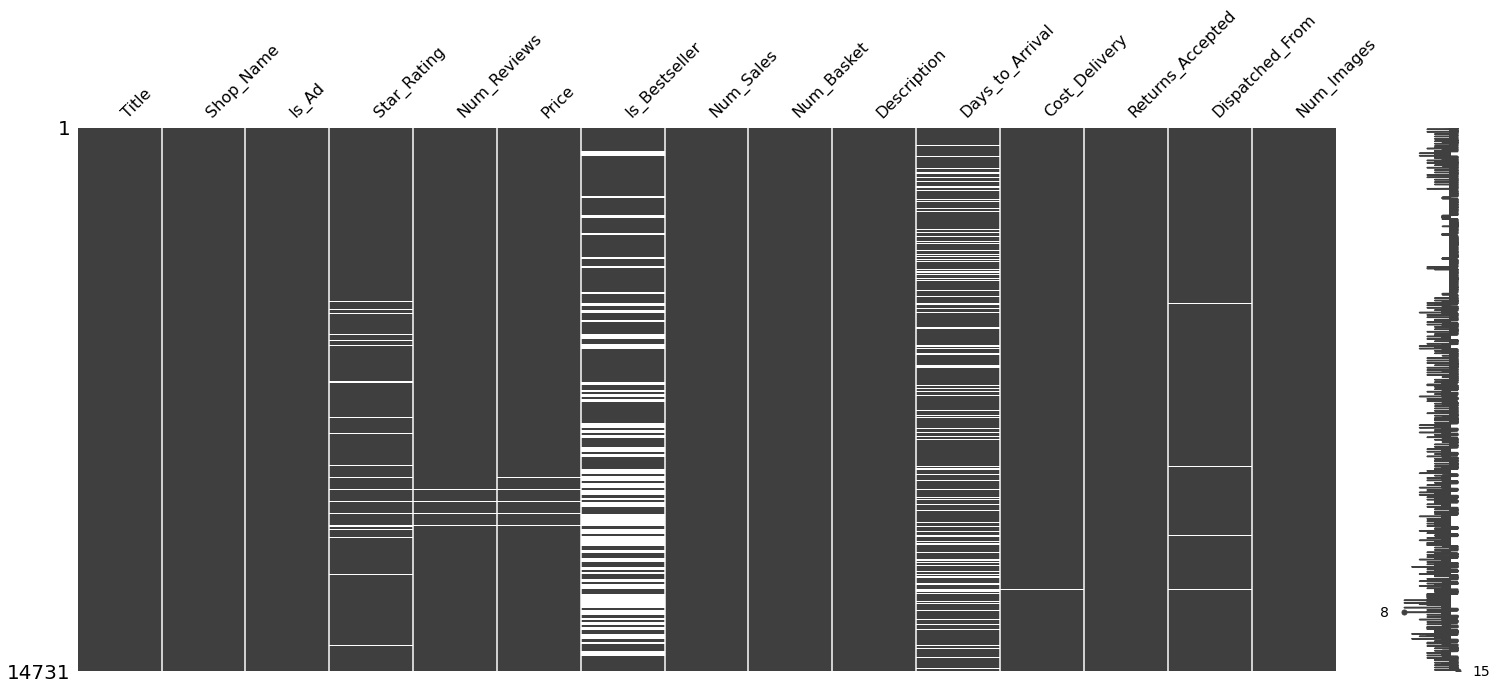

In [7]:
msno.matrix(df)
plt.show()

In [8]:
df.dropna(subset = ["Price"], inplace=True)
df.shape

(14188, 15)

In [9]:
df.isnull().sum()

Title                  0
Shop_Name              0
Is_Ad                  0
Star_Rating          372
Num_Reviews            0
Price                  0
Is_Bestseller       4442
Num_Sales              0
Num_Basket             0
Description            0
Days_to_Arrival     2529
Cost_Delivery         49
Returns_Accepted       0
Dispatched_From       80
Num_Images             0
dtype: int64

In [10]:
df.dtypes

Title                object
Shop_Name             int64
Is_Ad                 int64
Star_Rating          object
Num_Reviews          object
Price               float64
Is_Bestseller       float64
Num_Sales            object
Num_Basket            int64
Description          object
Days_to_Arrival     float64
Cost_Delivery       float64
Returns_Accepted      int64
Dispatched_From      object
Num_Images            int64
dtype: object

In [11]:
df['Num_Sales'] = df['Num_Sales'].str.replace(',', '')
df['Num_Sales'] = df['Num_Sales'].astype(int)

df['Num_Reviews'] = df['Num_Reviews'].str.replace(',', '')
df['Num_Reviews'] = df['Num_Reviews'].apply(lambda x: int(x) if x.isdigit() else np.nan)

ValueError: could not convert string to float: 'Add'

In [ ]:
digit = re.compile('\d+(\.\d+)?')

df['Star_Rating'] = df['Star_Rating'].apply(lambda x: float(x) if digit.match(x) else np.nan)

In [ ]:
df.describe()

In [ ]:
df = df.drop(['Is_Bestseller'], axis=1)
df = df[df['Days_to_Arrival'] > 0]
df = df[df['Num_Basket'] <= 20]
df.shape

In [ ]:
df[df['Star_Rating'].isnull()].head(10)

-All ads
-Few sales
-Likely don't have any reviews
-Will create two datasets - one imputing the NaNs with 0, the other dropping the NaN records

* group by shop names to see unique shops 
    * Price, days to arrival, cost delivery, num images for top-num sales shops 

In [ ]:
df.groupby('Shop_Name').agg({'Num_Sales':'mean','Price':'mean','Cost_Delivery':'mean','Num_Images': 'mean'}).sort_values('Num_Sales', ascending=False).reset_index()

In [ ]:
df.groupby('Num_Sales').sort_values(ascending=False)